# **Práctica 7: Fusion de datos**

Nombre(s):
- Cruz Rangel Leonardo Said\
- Téllez González Jorge Luis

Email(s):
- leonardochow20@gmail.com
- pontucorreo@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer una fusión de datos a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Amazon
DataAmazon = yf.Ticker('NVDA')

In [4]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2023-03-28', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,32.415188,34.360496,32.268795,33.799732,50875200,0.0,0.0
2019-01-03 00:00:00-05:00,33.196782,33.536717,31.683216,31.757652,70555200,0.0,0.0
2019-01-04 00:00:00-05:00,32.489624,34.174398,32.181947,33.792286,58562000,0.0,0.0
2019-01-07 00:00:00-05:00,34.365452,35.950977,33.851830,35.581268,70916000,0.0,0.0
2019-01-08 00:00:00-05:00,36.397614,36.419944,33.968458,34.695469,78601600,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,54740800,0.0,0.0
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,79729500,0.0,0.0
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,56488900,0.0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
AmazonHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1066 entries, 2019-01-02 00:00:00-05:00 to 2023-03-27 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1066 non-null   float64
 1   High          1066 non-null   float64
 2   Low           1066 non-null   float64
 3   Close         1066 non-null   float64
 4   Volume        1066 non-null   int64  
 5   Dividends     1066 non-null   float64
 6   Stock Splits  1066 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 66.6 KB


In [6]:
AmazonHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1066.000000,1066.000000,1066.000000,1066.000000,1.066000e+03,1066.000000,1066.000000
mean,134.908063,137.643357,132.128628,135.014872,4.626415e+07,0.000638,0.003752
std,75.376397,77.085695,73.445474,75.303861,2.049865e+07,0.005013,0.122513
min,32.415188,33.536717,31.683216,31.757652,9.788400e+06,0.000000,0.000000
25%,59.748165,60.480284,59.293968,59.915092,3.127150e+07,0.000000,0.000000
50%,133.486025,135.638868,131.009236,133.285706,4.360375e+07,0.000000,0.000000
75%,187.784794,192.068497,184.480082,188.181641,5.707628e+07,0.000000,0.000000
max,334.759027,346.045158,319.967146,333.350739,2.511528e+08,0.040000,4.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los valores a fusionar**

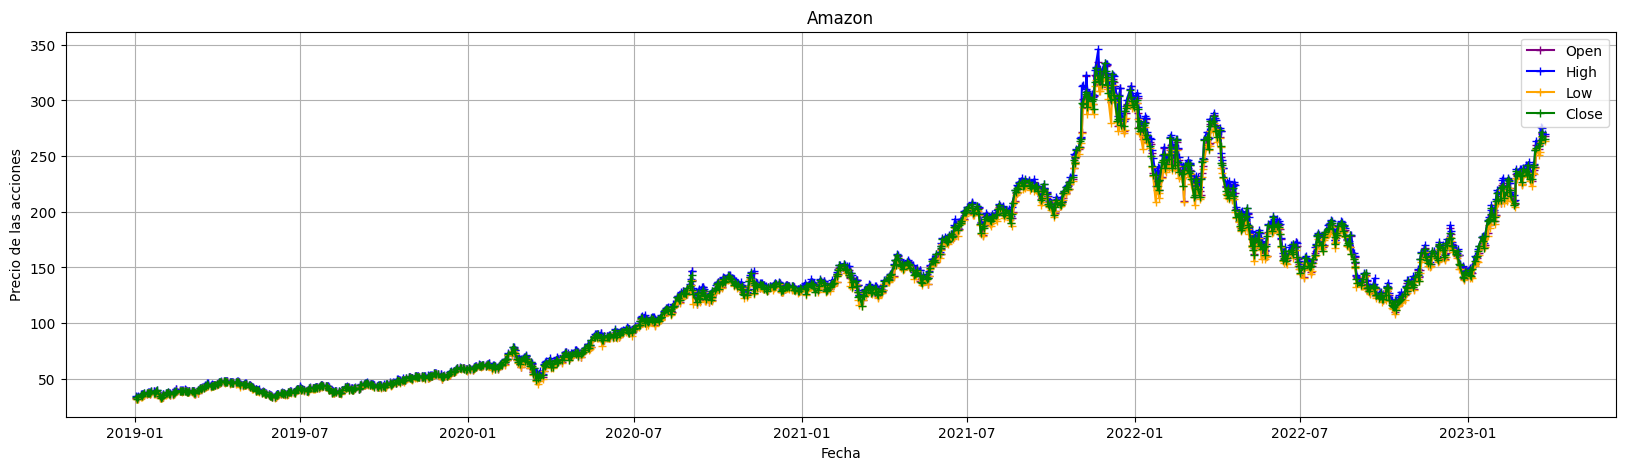

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='purple', marker='+', label='Open')
plt.plot(AmazonHist['High'], color='blue', marker='+', label='High')
plt.plot(AmazonHist['Low'], color='orange', marker='+', label='Low')
plt.plot(AmazonHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos de modo tradicional

In [8]:
Fusion = AmazonHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
Fusion

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,32.415188,34.360496,32.268795,33.799732
2019-01-03 00:00:00-05:00,33.196782,33.536717,31.683216,31.757652
2019-01-04 00:00:00-05:00,32.489624,34.174398,32.181947,33.792286
2019-01-07 00:00:00-05:00,34.365452,35.950977,33.851830,35.581268
2019-01-08 00:00:00-05:00,36.397614,36.419944,33.968458,34.695469
...,...,...,...,...
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004


In [9]:
# En caso de tener valores nulos
Fusion = Fusion.dropna()
Fusion

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,32.415188,34.360496,32.268795,33.799732
2019-01-03 00:00:00-05:00,33.196782,33.536717,31.683216,31.757652
2019-01-04 00:00:00-05:00,32.489624,34.174398,32.181947,33.792286
2019-01-07 00:00:00-05:00,34.365452,35.950977,33.851830,35.581268
2019-01-08 00:00:00-05:00,36.397614,36.419944,33.968458,34.695469
...,...,...,...,...
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004


In [10]:
#Promedio 
PromedioSimple = Fusion.loc[: , 'Open':'Close'] #   Toma todos los registros desde Open hasta Close.
Fusion['Media'] = PromedioSimple.mean(axis='columns') #Agrega una columna y guarda la media.
Fusion

,Open,High,Low,Close,Media
Date,,,,,
2019-01-02 00:00:00-05:00,32.415188,34.360496,32.268795,33.799732,33.211053
2019-01-03 00:00:00-05:00,33.196782,33.536717,31.683216,31.757652,32.543592
2019-01-04 00:00:00-05:00,32.489624,34.174398,32.181947,33.792286,33.159564
2019-01-07 00:00:00-05:00,34.365452,35.950977,33.851830,35.581268,34.937382
2019-01-08 00:00:00-05:00,36.397614,36.419944,33.968458,34.695469,35.370371
...,...,...,...,...,...
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,260.379997
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,266.797501
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,271.237495


In [11]:
#Mediana
Mediana = Fusion.loc[: , 'Open':'Close']
Fusion['Mediana'] = Mediana.median(axis='columns')
Fusion

,Open,High,Low,Close,Media,Mediana
Date,,,,,,
2019-01-02 00:00:00-05:00,32.415188,34.360496,32.268795,33.799732,33.211053,33.107460
2019-01-03 00:00:00-05:00,33.196782,33.536717,31.683216,31.757652,32.543592,32.477217
2019-01-04 00:00:00-05:00,32.489624,34.174398,32.181947,33.792286,33.159564,33.140955
2019-01-07 00:00:00-05:00,34.365452,35.950977,33.851830,35.581268,34.937382,34.973360
2019-01-08 00:00:00-05:00,36.397614,36.419944,33.968458,34.695469,35.370371,35.546541
...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,260.379997,261.894989
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,266.797501,264.464996
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,271.237495,271.529999


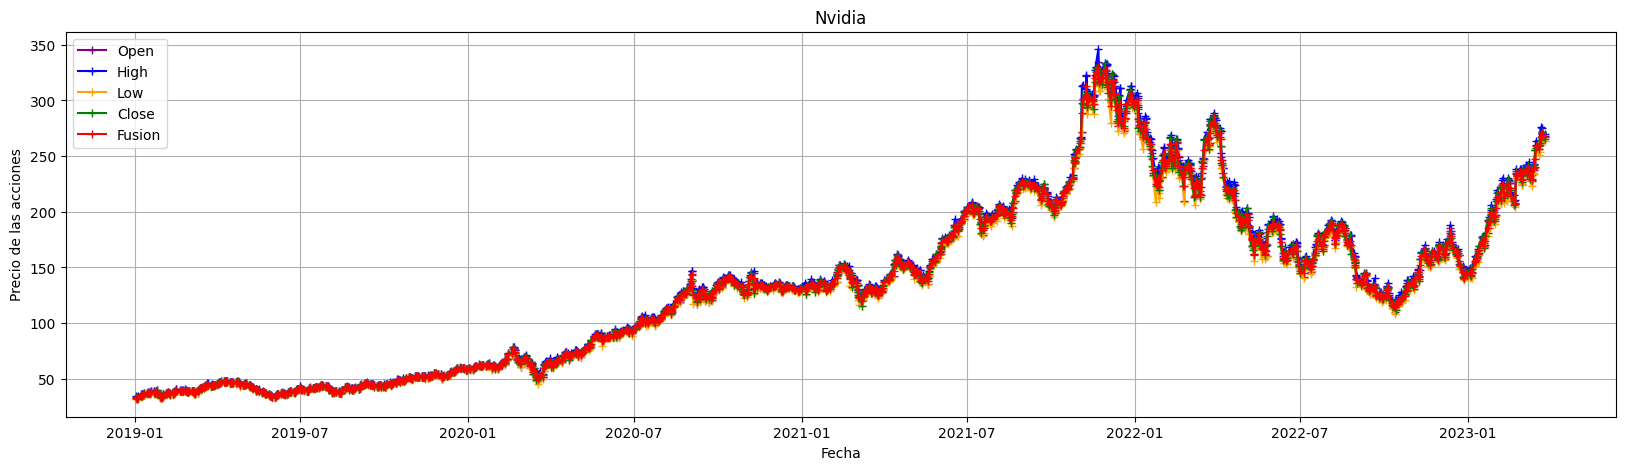

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Open'], color='purple', marker='+', label='Open')
plt.plot(Fusion['High'], color='blue', marker='+', label='High')
plt.plot(Fusion['Low'], color='orange', marker='+', label='Low')
plt.plot(Fusion['Close'], color='green', marker='+', label='Close')
plt.plot(Fusion['Media'], color='red', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Nvidia')
plt.grid(True)
plt.legend()
plt.show()

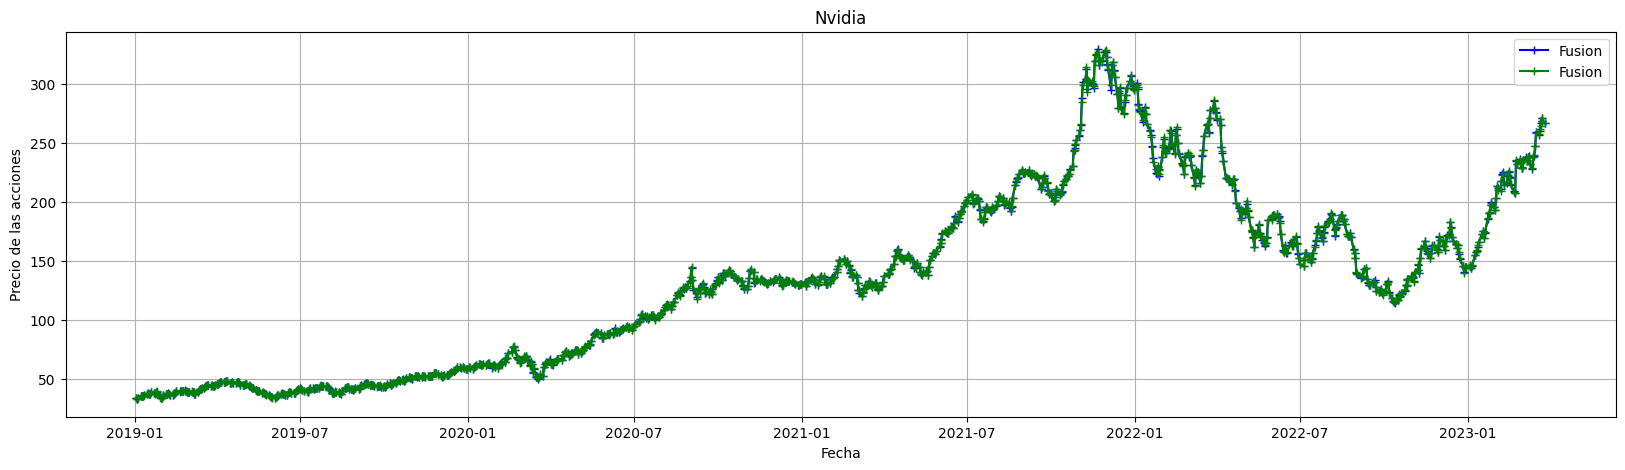

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Media'], color='blue', marker='+', label='Fusion')
plt.plot(Fusion['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Nvidia')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos mediante algoritmos de ML

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, max_error, r2_score 

In [15]:
X_train = np.array(Fusion[['Open', 'High', 'Low']]) 
pd.DataFrame(X_train) #Variables predictoras. 

,0,1,2
0,32.415188,34.360496,32.268795
1,33.196782,33.536717,31.683216
2,32.489624,34.174398,32.181947
3,34.365452,35.950977,33.851830
4,36.397614,36.419944,33.968458
...,...,...,...
1061,261.799988,263.920013,253.809998
1062,264.250000,275.890015,262.369995
1063,271.149994,274.989990,266.899994
1064,270.309998,271.670013,263.549988


In [16]:
Y_train = np.array(Fusion[['Close']])
pd.DataFrame(Y_train) #Regresora.

,0
0,33.799732
1,31.757652
2,33.792286
3,35.581268
4,34.695469
...,...
1061,261.989990
1062,264.679993
1063,271.910004
1064,267.790009


In [17]:
FusionLineal = linear_model.LinearRegression()
FusionLineal.fit(X_train, Y_train) 

LinearRegression()

In [18]:
#Se genera la estimación
Y_estimacion = FusionLineal.predict(X_train)
pd.DataFrame(Y_estimacion)

,0
0,33.957593
1,32.263745
2,33.681017
3,35.304117
4,34.437618
...,...
1061,257.174041
1062,272.637549
1063,271.094703
1064,266.094741


In [19]:
Fusion['FusionLineal'] = Y_estimacion
Fusion

,Open,High,Low,Close,Media,Mediana,FusionLineal
Date,,,,,,,
2019-01-02 00:00:00-05:00,32.415188,34.360496,32.268795,33.799732,33.211053,33.107460,33.957593
2019-01-03 00:00:00-05:00,33.196782,33.536717,31.683216,31.757652,32.543592,32.477217,32.263745
2019-01-04 00:00:00-05:00,32.489624,34.174398,32.181947,33.792286,33.159564,33.140955,33.681017
2019-01-07 00:00:00-05:00,34.365452,35.950977,33.851830,35.581268,34.937382,34.973360,35.304117
2019-01-08 00:00:00-05:00,36.397614,36.419944,33.968458,34.695469,35.370371,35.546541,34.437618
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,260.379997,261.894989,257.174041
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,266.797501,264.464996,272.637549
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,271.237495,271.529999,271.094703


In [20]:
print('Coeficientes: \n', FusionLineal.coef_)
print('Intercepto: \n', FusionLineal.intercept_)
print("MSE: %.4f" % mean_squared_error(Y_train, Y_estimacion))
print("RMSE: %.4f" % mean_squared_error(Y_train, Y_estimacion, squared=False))  #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_train, Y_estimacion))

#Incercepto = a.
#Coeficientes de cada predictor.
#Aproximación de 0.9993

Coeficientes: 
 [[-0.66574814  0.82875811  0.83812689]]
Intercepto: 
 [0.01605965]
MSE: 4.0059
RMSE: 2.0015
Score (Bondad de ajuste): 0.9993


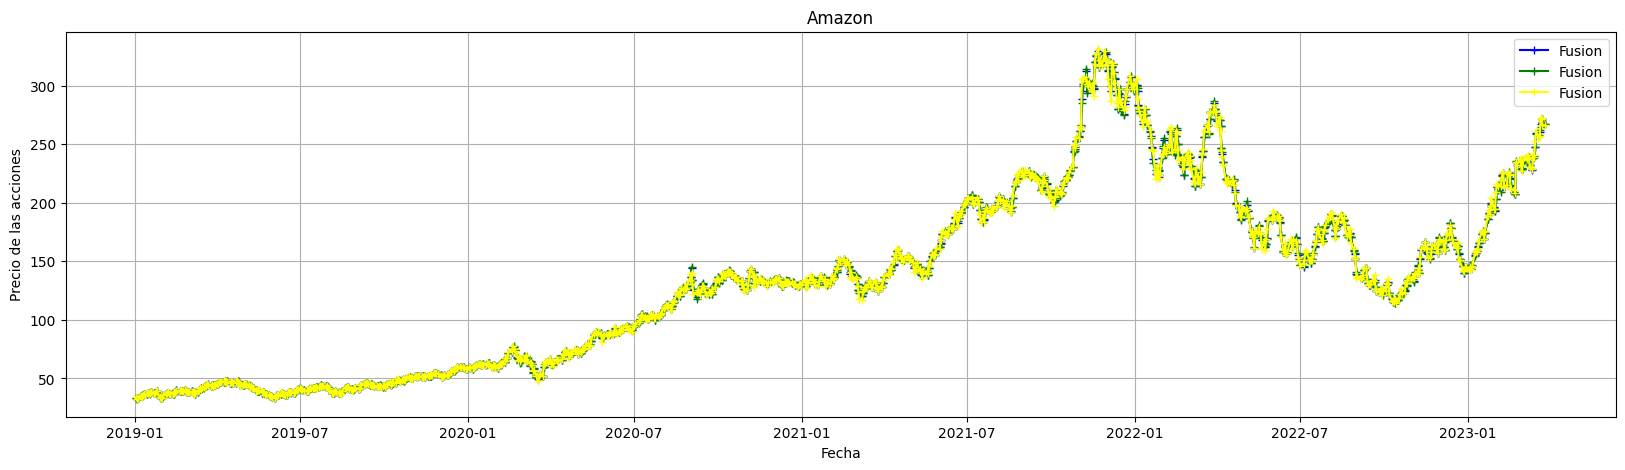

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Media'], color='blue', marker='+', label='Fusion')
plt.plot(Fusion['Mediana'], color='green', marker='+', label='Fusion')
plt.plot(Fusion['FusionLineal'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()